# BIOMEDICAL IMAGE ANALYSIS IN PYTHON
[datacamp.com](www.datacamp.com)



In [ ]:
# Project Folder:
%cd /content/drive/MyDrive/Biomedical_Image_Processing_Datacamp

/content/drive/MyDrive/Biomedical_Image_Processing_Datacamp


#CHAPTER 4: Image Comparison

## SPATIAL TRANSFORMATIONS

Now that you've seen how we can measure a single image let's turn our attention to questions that leverage many of them.


### OASIS Database
For this chapter, we're going to look at brains from the Open Access Series of Imaging Studies. To describe the effects of aging and dementia on the brain, the researchers gathered 3D MRI images of nearly 400 adults. The participants were between the ages of 18 and 80, and many of them had mild to severe Alzheimer's disease.



### Significant variability
With a large imaging dataset, there is going to be variability and not just the kind that's interesting. There will be differences in intensity scales, sampling ratios, object orientation, and object placement within the image window.



### Registration
One way to address this is to register images to a pre-defined position and coordinate system. For example, you might make all images line up with a template image or atlas. The process of aligning two images together is called "registration." Registration requires making multiple transformations to an image, such as shifting, rotating, and scaling it.



### Affine transformations preserve points, lines, and planes
Affine transformations modify an image while preserving all of the points, straight lines, and planes. Shown here are four examples of affine transformations. Translation is the shifting of an image along an axis. It can be used to center an object, for example. Rotation, on the other hand, will turn the image along a plane. Scaling increases or decreases the size of the image, and the shearing operation shifts the ends of an axis away from each other.



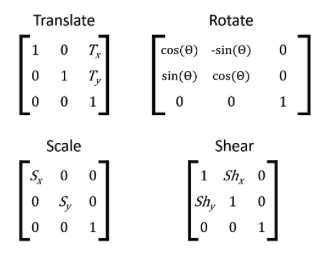

In [ ]:
from IPython.display import Image 
Image("./Images/affine_transform.png")

### Translation
Let's see how we can implement some of these transformations in SciPy. Here we have an off-center brain that we want to move to the center of the image. First, we'll load the head slice using ImageIO. It has a shape of 256 by 256, so the center is at 128, 128. Then we'll get the head's initial center of mass. We next calculate the difference between the head's current center of mass and the target center, for both the rows and the columns. Finally, we call SciPy's shift() function, passing in the image and the number of pixels we need to move along the first and second axes.



### Rotation
Rotations can be performed in a similar manner using the rotate() function. The angle of rotation is specified in degrees, with positive numbers indicating upward from the horizontal, and negative numbers downward. In two dimensions, we always rotate along the x-y plane, but in three dimensions, there are three rotational planes we could use.



### Image rotation
One caveat with the rotate() function is that the default behavior preserves all the original data. This means that your rotated image may actually end up larger than your original. To keep your original image shape, pass "reshape equals False" to your function call.



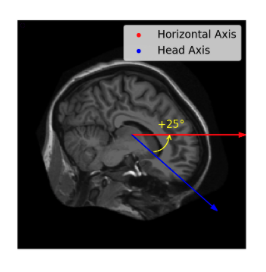

In [ ]:
Image('./Images/rotations.png')

### Transformation matrix
For complex registrations, it can be useful to compute a transformation matrix between the original and target space. Essentially, the elements of a transformation matrix encode instructions for the operations we have discussed: translation, rotation, scaling, and shearing. We cannot cover methods for calculating these matrices, but let's see how they can be used to simplify the registration process.



### Applying a transformation matrix
First, we create the transformation matrix. Let's first use the identity matrix, which has ones along the diagonal and zeros off it. We can apply it by passing the image and matrix to the affine_transform() function. The resulting image is identical to the original. Next, let's manipulate the matrix values that encode shifting and rescaling. When we apply this new matrix and plot the result, you can see that the image has been centered and made larger.

#### Exercise: Translations

In this chapter, we'll leverage data use data from the [Open Access Series of Imaging Studies](https://www.oasis-brains.org) to compare the brains of different populations: young and old, male and female, healthy and diseased.

To start, center a single slice of a 3D brain volume (im). First, find the center point in the image array and the center of mass of the brain. Then, translate the image to the center.




In [ ]:
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [ ]:
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

#### Exercise: Rotations

In cases where an object is angled or flipped, the image can be rotated. Using ndi.rotate(), the image is rotated from its center by the specified degrees from the right horizontal axis.
For this exercise, shift and rotate the brain image (im) so that it is roughly level and "facing" the right side of the image.

In [ ]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and rotated images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
#format_and_render_plot()
#The order of transformations makes a difference: 
#rotating the image first will alter the object center, 
#changing the amount of shift needed.

#### Exercise: Affine Transform
An affine transformation matrix provides directions for up to four types of changes: translating, rotating, rescaling and shearing. The elements of the matrix map the coordinates from the input array to the output.

For this exercise, use **ndi.affine_transform()** to apply the following registration matrices to im. Which one does the best job of centering, leveling and enlarging the original image?

In [ ]:
mat = [[0.8, -0.4, 90], [0.4, 0.8, -6.0], [0, 0, 1]]
xfm = ndi.affine_transform(im, mat)
plt.imshow(xfm)
plt.show()

## RESAMPLING AND INTERPOLATION

To implement matrix transformations in your workflow, you will likely want to use more advanced tools, such as those in scikit-image.  Also, note that 3D images require different size transformation matrices.

### Resampling and interpolation
When comparing images, differences in array shape and sampling rates can pose hurdles to analysis. Resampling is one way to address this issue.

### Resampling changes the array shape
Resampling is the process of slicing your data onto a different array. It's distinct from cropping in that the field of view does not change. Instead, the amount of space sampled by each pixel is increased or decreased, which in turn changes the shape of the array.

### Downsampling
One useful application is "downsampling," in which information is merged across multiple pixels to reduce the image size. Here we have loaded a brain volume from the OASIS dataset. Originally, it has 256 elements along each dimension. We'll halve this grid size using SciPy's zoom() function. zoom() adjusts the number of elements along each axis by a given factor. We pass in the volume and specify a zoom of 0.5. This reduces the number of elements on each axis by half so that it is 128 by 128 by 128. Plotting the image reveals that it now has less detail than before, but it also takes up half the amount of memory.

###Upsampling
It's also possible to upsample onto denser grids. But note that this does not result in a true increase in resolution. Even though you are putting more pixels into your image, you are not adding new information that wasn't there previously. One useful application of upsampling is to make sampling rates along different dimensions equal, for example, to make voxels cubic. To upsample an image, we call the zoom() function and specify a larger zoom factor. Passing in "2" will double the width of each axis.

###Interpolation
Resampling actually creates a brand new image that's based on the old one. And in most cases, filling out this new image requires estimating data that wasn't originally there. This estimation process is called interpolation. For example, here we have a simple 10 point dataset. If we want to upsample it to include 100 points, we have to estimate what the values should be between each of these original points.

For higher-order estimation, SciPy uses B-spline interpolation, which uses a set of functions to model the space between points. The order controls how complex these functions can be: an order of 1 is linear, an order of 2 is quadratic, and so on. In the example, you can see that cubic interpolation creates a smooth curve between points.

###Interpolation in 2D
Here we've created a ten by ten toy image of ascending values. If we resample it onto a 100 by 100 grid, changing the order will affect the "smoothness" of the resulting image. With an order of 0, we return essentially the original image on a new grid. At higher orders, though, we can see a smoother gradient of change along each axis. The principal trade-off with lower and higher-order interpolation is in the computational time: fifth-order interpolation for a 3D volume can take a very long time to calculate!

#### Exercise: Resampling

Images can be collected in a variety of shapes and sizes. Resampling is a useful tool when these shapes need to be made consistent. Two common applications are:

*  **Downsampling:** combining pixel data to decrease size
*  **Upsampling:** distributing pixel data to increase size

For this exercise, transform and then resample the brain image (im) to see how it affects image shape.



In [ ]:
# Center and level image
xfm = ndi.shift(im, shift=(-20,-20))
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=0.25)
im_up = ndi.zoom(xfm, zoom=4)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
#format_and_render_plot()

# You can also resample data along a single dimension by passing 
# a tuple: e.g. ndi.zoom(im, zoom=(2,1,1)). 
# This can be useful for making voxels cubic.

#### Exercise: Interpolation

Interpolation is how new pixel intensities are estimated when an image transformation is applied. It is implemented in SciPy using sets of [spline functions](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html).

Editing the interpolation **order** when using a function such as **ndi.zoom()** modifies the resulting estimate: higher orders provide more flexible estimates but take longer to compute.

For this exercise, upsample im and investigate the effect of different interpolation orders on the resulting image.

In [ ]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up5.shape)


# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])
#format_and_render_plots()

#The key trade-off is that more complex interpolation methods require greater 
#computational resources. This can take a heavy toll when analyzing 3D volumes.

## COMPARING IMAGES

How do you tell if your images are registered well? How would you compare an automatically segmented image with a hand-labeled one? To directly compare two arrays, you have to generate measures of image similarity.

Here are two slices of the same person's brain, taken on separate occasions. You can see that they are similar objects but not aligned with each other. To quantify exactly how imperfect this alignment is, we need to apply a function that will compare the two images.

###Summary metrics
At the pixel level, there can be thousands and thousands of comparison points between two images. Our need is to summarize all of these comparisons into a single number. As with other areas of data science, such as machine learning, there are many ways to evaluate our data. There are cost functions, such as the mean absolute error or mean squared error, which should be minimized. Objective functions, such as the intersection of the union, are supposed to be maximized.

###Mean absolute error
Let's return to our two images, and calculate similarity using a cost function: the mean absolute error. First, we read in the images. Then, we find the error at each pixel by subtracting im2 from im1. Next, we take the absolute value of the error, because we care about whether the images differ from each other in any way, not whether one is larger than the other. Finally, we take the mean of the entire error image to get a single summary measure of similarity.

The goal is not to achieve a mean absolute error of zero. In fact, that would mean the images were identical, which is not the case. Instead, you want to minimize the cost function by altering one or both images. Let's shift and rotate the first image, then re-compute the cost. We calculate the mean absolute error in the same way as before, using our new image. The new cost is lower than the previous one, suggesting that the two are better aligned than before.

### Intersection Of The Union
One issue with the mean absolute error approach is that tissues with high-intensity values will contribute more towards the error than other types. One remedy is to compare the image masks. The intersection of the union is a measure particularly well-suited to this. It is calculated by dividing the number of shared pixels between two masks by the total number of masked pixels. First, we create image masks by selecting pixels greater than 0. Second, we take the intersection of the two masks: that is, the pixels that appear in both masks. Next, we find the union: the pixels that appear in either mask. Finally, we divide the sum of the intersection by the sum of the union. The result is a number between 0 and 1, with 0 representing no shared mask pixels, and 1 representing perfect agreement.

#### Exercise: Mean Absolute Error

Cost functions and objective functions output a single value that summarizes how well two images match.

The **mean absolute error (MAE)**, for example, summarizes intensity differences between two images, with higher values indicating greater divergence.

For this exercise, calculate the mean absolute error between **im1** and **im2** step-by-step.

In [ ]:
'''
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
#format_and_render_plot()

# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)
'''

"\n# Calculate mean absolute error\nmean_abs_err = np.mean(np.abs(im1 - im2))\nprint('MAE:', mean_abs_err)\n\n# Calculate absolute image difference\nabs_err = np.abs(im1 - im2)\n\n# Plot the difference\nplt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)\n#format_and_render_plot()\n\n# Calculate mean absolute error\nmean_abs_err = np.mean(np.abs(im1 - im2))\nprint('MAE:', mean_abs_err)\n"

#### Exercise: Intersection of the Union
Another cost function is the **intersection of the union (IOU)**. The IOU is the number of pixels filled in both images (the intersection) out of the number of pixels filled in either image (the union).

For this exercise, determine how best to transform **im1** to maximize the IOU cost function with **im2**. We have defined the following function for you:



```
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()
```
Note: When using **ndi.rotate()**, remember to pass reshape=False, so that array shapes match.

Multiple choice:
Shift (-10, -10), rotate -15 deg.
Shift (10, 10), rotate -15 deg.
Shift (10, 10), rotate +15 deg.
Shift (-10, -10), rotate +15 deg.


In [ ]:
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

In [ ]:
'''
#4 option - correct answer (but for different image):
xfm = ndi.shift(im1, shift=(-10, -10))
xfm = ndi.rotate(xfm, angle=-15, reshape=False)
intersection_of_union(xfm, im2)
'''

'\n#4 option - correct answer (but for different image):\nxfm = ndi.shift(im1, shift=(-10, -10))\nxfm = ndi.rotate(xfm, angle=-15, reshape=False)\nintersection_of_union(xfm, im2)\n'

## NORMALIZING MEASUREMENTS

###Analysis workflow
Shown here is a common multi-subject workflow, in which each subject has a raw image that we process, measure, and store in a common group dataset. In this model, each image is treated independently, but you are extracting the same metrics from each subject.

###OASIS population
For this lesson, let's assume that we have measured the brain volumes for all 400 images in the OASIS dataset and stored them in a pandas DataFrame. Displaying a few random rows shows that we have information such as age, sex, brain volume, and skull volume available.



###Hypothesis testing
With this data, we want to answer a crucial question: are the brains of men and women different? How would we test this?

For this question, we can use a two-sample t-test. We will test the null hypothesis that the mean brain volumes of men and women are the same. The likelihood of the null hypothesis being true is assessed by calculating the t-statistic. If the magnitude of t is very far from 0, then we can reject the null hypothesis that the groups are the same. Fortunately, this function is already implemented in SciPy and is simple to evaluate.

To run the t-test, we need the brain volumes for all of the males and females in our sample. Select the male values with df dot loc, then specifying the rows where "sex is male" and the column with "brain volume" values. For females, we change the selected sex to "female." To run the t-test, import the ttest_ind() function from SciPy's stats module. Then, pass the two vectors as our first and second populations. The results object contains the test statistic, which is quite high, and the p-value. The p-value corresponds to the probability that the null hypothesis is true. In this case, we have a large t-statistic and a low p-value, which suggests that there's a significant difference in gender brain size! Should we start writing it up?

###Correlated measurements
Not so fast. We need to consider the context in which this measurement is acquired. Brains fill up skulls, and skulls are proportional to body size. If we compare brain and skull volumes, we find that they have quite a large correlation. Accounting for this shared variation is important if we want to state that there's something different about the brains of men and women and not just their body size.

###Many potential confounds in imaging
Confounds are omnipresent in data science but can be especially pervasive in image analyses. If you are pooling data across multiple hospitals or sites, you must consider how image acquisition, digital storage, clinical protocols, and subject populations might be biased towards a particular result. In short, you may employ extremely sophisticated image analysis techniques, but if your analytical thinking is faulty, then your conclusions will be too!

###Normalization
To account for this potential confound, we can normalize brain volume with respect to skull size by calculating the brain to skull ratio. We can then repeat our t-test using the normalized values for males and females. Reviewing the results leads to disappointment: our amazing finding was likely related simply to the fact that large people have larger brains, and there are more large men than large women.

####Exercise: Identifying potential confounds

Once measures have been extracted, double-check for dependencies within your data. This is especially true if any image parameters (sampling rate, field of view) might differ between subjects, or you pull multiple measures from a single image.

For the final exercises, we have combined demographic and brain volume measures into a pandas DataFrame (**df**).

First, you will explore the table and available variables. Then, you will check for correlations between the data.

In [ ]:
'''
# Print random sample of rows
print(df.sample(3))

# Print prevalence of Alzheimer's Disease
print(df.alzheimers.value_counts())

# Print a correlation table
print(df.corr())
'''

"\n# Print random sample of rows\nprint(df.sample(3))\n\n# Print prevalence of Alzheimer's Disease\nprint(df.alzheimers.value_counts())\n\n# Print a correlation table\nprint(df.corr())\n"

#### Exercise: Testing Group Differences

Let's test the hypothesis that Alzheimer's Disease is characterized by reduced brain volume.

We can perform a **two-sample t-test** between the brain volumes of elderly adults with and without Alzheimer's Disease. In this case, the two population samples are independent from each other because they are all separate subjects.

For this exercise, use the OASIS dataset **(df)** and ttest_ind to evaluate the hypothesis.

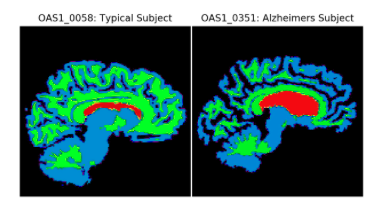

In [ ]:
Image('./Images/testing_group_differences.png')

In [ ]:
'''
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

There is some evidence for decreased brain volume in individuals with 
Alzheimer's Disease. Since the p-value for this t-test is 
greater than 0.05, we would not reject the null hypothesis 
that states the two groups are equal.
'''

'\n# Import independent two-sample t-test\nfrom scipy.stats import ttest_ind\n\n# Select data from "alzheimers" and "typical" groups\nbrain_alz = df.loc[df.alzheimers == True, \'brain_vol\']\nbrain_typ = df.loc[df.alzheimers == False, \'brain_vol\']\n\n# Perform t-test of "alz" > "typ"\nresults = ttest_ind(brain_alz, brain_typ)\nprint(\'t = \', results.statistic)\nprint(\'p = \', results.pvalue)\n\n# Show boxplot of brain_vol differences\ndf.boxplot(column=\'brain_vol\', by=\'alzheimers\')\nplt.show()\n\nThere is some evidence for decreased brain volume in individuals with \nAlzheimer\'s Disease. Since the p-value for this t-test is \ngreater than 0.05, we would not reject the null hypothesis \nthat states the two groups are equal.\n'

####Exercise: Normalizing metrics
We previously saw that there was not a significant difference between the brain volumes of elderly individuals with and without Alzheimer's Disease.

But could a correlated measure, such as **"skull volume"** be masking the differences?

For this exercise, calculate a new test statistic for the comparison of brain volume between groups, after adjusting for the subject's skull size.

Using results.statistic and results.pvalue as your guide, answer the question: **Is there strong evidence that Alzheimer's Disease is marked by smaller brain size, relative to skull size?**

In [ ]:
'''
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Adjust `brain_vol` by `skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

Correct answer: Yes, reject the null hypothesis! Based on the results.statistic and results.pvalue.

Final note: For more advanced tools, I recommend checking out scikit-image,
 which extends the capabilities of scipy for image processing.
'''

"\n# Import independent two-sample t-test\nfrom scipy.stats import ttest_ind\n\n# Adjust `brain_vol` by `skull_vol`\ndf['adj_brain_vol'] = df.brain_vol / df.skull_vol\n\n# Select brain measures by group\nbrain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']\nbrain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']\n\n# Evaluate null hypothesis\nresults = ttest_ind(brain_alz, brain_typ)\nprint('t = ', results.statistic)\nprint('p = ', results.pvalue)\n\nCorrect answer: Yes, reject the null hypothesis! Based on the results.statistic and results.pvalue.\n\nFinal note: For more advanced tools, I recommend checking out scikit-image,\n which extends the capabilities of scipy for image processing.\n"

## REFERENCES:


*   [Datacamp course "BIOMEDICAL IMAGE ANALYSIS":](https://campus.datacamp.com/courses/biomedical-image-analysis-in-python/exploration?ex=3)
*   ["Decode DICOM files for medical imaging" Colab Notebook](https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/dicom.ipynb#scrollTo=qFdPvlXBOdUN)  
*   [Imageio documentation](https://imageio.readthedocs.io/en/stable/examples.html)
